For this set of data, I am going to use supervised learning that I learned, specifically: 
*   Linear Regression
*   Multiple Regression
*   Support Vector Machine
*   K-Nearest Neighbor

I am aiming to predict deaths given the rest of the demographic and statistical data from what I am given in the CDC dataset.






Cleaning the data
Out of all 12 columns, I only strategically chose 6 based on how many rows had missing or unknown information

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving CDC_data_minimized.csv to CDC_data_minimized.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['CDC_data_minimized.csv']))

In [ ]:
df = df.astype('category')
cleandf = df[['sex','age_group','race_ethnicity_combined','hosp_yn','icu_yn','medcond_yn',
              'death_yn']]

valuesList=['Missing','Unknown']
indexNames=cleandf[(cleandf['hosp_yn']).isin(valuesList)|(cleandf['icu_yn'].isin(valuesList))
                    |(cleandf['race_ethnicity_combined'].isin(valuesList))|(cleandf['sex'].isin(valuesList))|(cleandf['death_yn'].isin(valuesList))].index

cleandf.drop(indexNames, inplace=True)
cleandf.head(2000)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,medcond_yn,death_yn
0,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
1,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,Yes,No
2,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,Male,10 - 19 Years,"Black, Non-Hispanic",Yes,No,No,No
4,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,Yes,No
...,...,...,...,...,...,...,...
2266,Female,80+ Years,"White, Non-Hispanic",Yes,No,Yes,Yes
2267,Female,80+ Years,"White, Non-Hispanic",No,No,Yes,No
2268,Female,80+ Years,"White, Non-Hispanic",No,No,Yes,No
2269,Female,80+ Years,"White, Non-Hispanic",No,No,Yes,No


Before I move on, I will need to convert these categorical variables to numerical, because these algorithms require numeric input. I'll be using the replace function which allws me to convert each value in a column to a number for the columns with binary input.

In [ ]:
cleandf['sex'] = df['sex'].map({'Male':1 ,'Female':0})
cleandf['hosp_yn'] = df['hosp_yn'].map({'Yes':1 ,'No':0})
cleandf['icu_yn'] = df['icu_yn'].map({'Yes':1 ,'No':0})
cleandf['medcond_yn'] = df['medcond_yn'].map({'Yes':1 ,'No':0})
cleandf['death_yn'] = df['death_yn'].map({'Yes':1 ,'No':0})
cleandf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,medcond_yn,death_yn
0,1.0,10 - 19 Years,"Black, Non-Hispanic",0,0,0,0
1,1.0,10 - 19 Years,"Black, Non-Hispanic",0,0,1,0
2,1.0,10 - 19 Years,"Black, Non-Hispanic",0,0,0,0
3,1.0,10 - 19 Years,"Black, Non-Hispanic",1,0,0,0
4,1.0,10 - 19 Years,"Black, Non-Hispanic",0,0,1,0


Then I will encode the remaining two columns with non-binary input, ethnicity and age

In [ ]:
setAge=set(cleandf['race_ethnicity_combined'])
setAge

{0, 1, 2, 3, 5, 6, 8}

In [ ]:
#cleandf['race_ethnicity_combined']=cleandf['race_ethnicity_combined'].cat.codes
#cleandf['age_group']=cleandf['age_group'].cat.codes
cleandf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,medcond_yn,death_yn
0,1.0,1,2,0,0,0,0
1,1.0,1,2,0,0,1,0
2,1.0,1,2,0,0,0,0
3,1.0,1,2,1,0,0,0
4,1.0,1,2,0,0,1,0


I'm going to split the dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing. I will create a mask to select random rows using the np.random.rand() function:

In [ ]:
msk = np.random.rand(len(cleandf)) < 0.8
train = cleandf[msk]
test = cleandf[~msk]

# Multiple Linear Regression

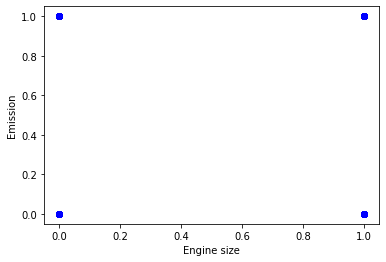

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train.sex, train.death_yn,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['sex','age_group','race_ethnicity_combined','hosp_yn','icu_yn','medcond_yn']])
y = np.asanyarray(train[['death_yn']])
regr.fit(x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[0.00620367 0.04022685 0.00424536 0.13332979 0.26644462 0.02478191]]


Prediction using Ordinary Least Squares
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ( 𝑦̂  ) over all samples in the dataset.

In [ ]:
y_hat= regr.predict(test[['sex','age_group','race_ethnicity_combined','hosp_yn','icu_yn','medcond_yn']])
x = np.asanyarray(test[['sex','age_group','race_ethnicity_combined','hosp_yn','icu_yn','medcond_yn']])
y = np.asanyarray(test[['death_yn']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 0.07
Variance score: 0.33


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


The Variance score was low, and thus the model is probably not super accurate; however, the Residual sum of squares is pretty low. 

In [ ]:
testdf=pd.DataFrame(columns=['sex','age_group','race_ethnicity_combined','hosp_yn','icu_yn','medcond_yn'])
testdf['sex']=np.random.randint(0,2,size=(10))
testdf['age_group']=np.random.randint(0,9,size=(10))
testdf['race_ethnicity_combined']=np.random.randint(0,9,size=(10))
testdf['hosp_yn']=np.random.randint(0,2,size=(10))
testdf['icu_yn']=np.random.randint(0,2,size=(10))
testdf['medcond_yn']=np.random.randint(0,2,size=(10))
testdf

In [ ]:
y_hat2= regr.predict(testdf[['sex','age_group','race_ethnicity_combined','hosp_yn','icu_yn','medcond_yn']])
testdf['death_yn']=y_hat2

testdf

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,medcond_yn,death_yn
0,0,3,6,0,1,1,0.271728
1,0,8,6,0,0,1,0.206418
2,0,7,7,0,0,0,0.145654
3,1,6,7,1,1,1,0.536187
4,0,2,3,0,0,0,-0.072461
5,0,2,3,0,0,0,-0.072461
6,0,6,8,0,1,1,0.400899
7,1,0,6,1,1,1,0.290581
8,1,8,3,1,0,1,0.333215
9,0,7,4,0,0,1,0.157700


# Support Vector Machine


SVM might prove to be better than Multiple Regression because it involbes a lot of paramerter tuning, and can handle high dimensional and complex data structures, as well as multiple features. 

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

Here I am just visualizing some data, with race and age as factors.

In [ ]:
ax = cleandf[cleandf['death_yn'] == 1][0:50].plot(kind='scatter', x='age_group', y='race_ethnicity_combined', color='DarkBlue', label='Dead');
cleandf[cleandf['death_yn'] == 0][0:50].plot(kind='scatter', x='age_group', y='race_ethnicity_combined', color='Yellow', label='alive', ax=ax);
plt.show()

NameError: ignored

Now I'm going to split the dataset to train and test it

In [ ]:
x_svm = np.asarray(cleandf)
y_svm = np.asarray(cleandf['death_yn'])
X_train2, X_test2, y_train2, y_test2 = train_test_split( x_svm, y_svm, test_size=0.2, random_state=4)
print ('Train set:', X_train2.shape,  y_train2.shape)
print ('Test set:', X_test2.shape,  y_test2.shape)

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset. We usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this.

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train2, y_train2) 

In [ ]:
yhat2 = clf.predict(X_test2)
yhat2 [0:5]

Once the model is trained and tested, we can evaluate the success using classification reports and confusion matrices. 



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test2, yhat2, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test2, yhat2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Dead(1)','Alive(0)'],normalize= False,  title='Confusion matrix')

I will also calculate the f1_score and jaccard index


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test2, yhat2, average='weighted') 

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test2, yhat2,pos_label=0)

It's also possible to build the model with diferent kernels. Here I will use a linear kernel

In [ ]:
clf3 = svm.SVC(kernel='linear')
clf3.fit(X_train2, y_train2) 
yhat3 = clf3.predict(X_test2)
print("Avg F1-score: %.4f" % f1_score(y_test2, yhat3, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test2, yhat3,pos_label=1))

# K Nearest Neighbors

K-Nearest Neighbors is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

Let’s see how many of each class is in our data set

In [ ]:
df['death_yn'].value_counts()

No     2316
Yes     282
Name: death_yn, dtype: int64

In [ ]:
x_knn=cleandf[['sex','age_group','race_ethnicity_combined','hosp_yn','icu_yn','medcond_yn']].values
y=cleandf['death_yn']

In [ ]:
x_knn = preprocessing.StandardScaler().fit(x_knn).transform(x_knn.astype(float))
x_knn[0:5]

array([[ 1.04, -1.59, -1.13, -0.58, -0.3 , -1.2 ],
       [ 1.04, -1.59, -1.13, -0.58, -0.3 ,  0.83],
       [ 1.04, -1.59, -1.13, -0.58, -0.3 , -1.2 ],
       [ 1.04, -1.59, -1.13,  1.73, -0.3 , -1.2 ],
       [ 1.04, -1.59, -1.13, -0.58, -0.3 ,  0.83]])

I'll be using the same train test split from SVM

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

I'm starting the algorithm with k=4 for now

In [ ]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train2,y_train2)

In [ ]:
yhat4 = neigh.predict(X_test2)
yhat4[0:5]

array([0, 0, 0, 0, 0])

In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train2, neigh.predict(X_train2)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test2, yhat4))

Train set Accuracy:  0.9870480302212629
Test set Accuracy:  0.9762931034482759


K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train2,y_train2)
    yhat=neigh.predict(X_test2)
    mean_acc[n-1] = metrics.accuracy_score(y_test2, yhat4)

    
    std_acc[n-1]=np.std(yhat4==y_test2)/np.sqrt(yhat.shape[0])

mean_acc

array([0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98])

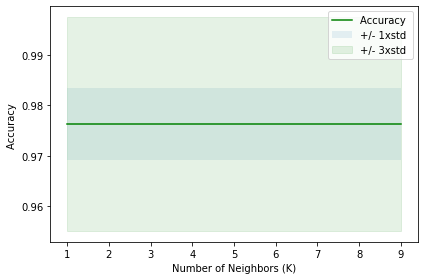

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9762931034482759 with k= 1
